# Unsupervised Learning: Clustering Lab





In [28]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
from scipy.io import arff

## 1. Initial practice with the K-means and HAC algorithms

### 1.1 (10%) K-means
Run K-means on this [Abalone Dataset.](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/abalone.arff)
The dataset was modified to be smaller. The last datapoint should be on line 359 or the point 0.585,0.46,0.185,0.922,0.3635,0.213,0.285,10. The remaining points are commented out. Treat the output class (last column) as an additional input feature. Create your K-Mmeans model with the paramaters K-means(n_clusters=3, init='random', n_init=1)

Output the following:
- Class label for each point (labels_)
- The k=3 cluster centers (cluster_centers_)
- Number of iterations it took to converge (n_iter_)
- Total sum squared error of each point from its cluster center (inertia_)
- The total average silhouette score (see sklearn.metrics silhouette_score)

In [29]:
# K-means with Abalone
data = arff.loadarff('abalone.arff')
df = pd.DataFrame(data[0])
df = df.map(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
df = pd.get_dummies(df, drop_first=True)
Data_Set = df.to_numpy()

print('5 initial Iterations:')
print()

for i in range(1, 6):
  print(f'Iteration {i}')
  clf = KMeans(n_clusters=3, init='random', n_init=1)
  clf.fit(Data_Set)
  labels = clf.labels_

  print(f'Labels: {labels}')
  print(f'Cluster Centers: {clf.cluster_centers_}')
  print(f'Iterations: {clf.n_iter_}')
  print(f'Sum Squared Error: {clf.inertia_}')
  silhouette = silhouette_score(Data_Set, clf.fit_predict(Data_Set))
  print(f'Average Silhouette Score: {silhouette}')
  print()

5 initial Iterations:

Iteration 1
Labels: [2 1 0 0 1 1 2 2 0 2 2 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 0 1 2
 1 0 0 0 2 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 2 0
 0 2 0 0 0 2 0 0 2 2 2 0 0 0 0 0 2 0 0 0 2 2 0 1 1 0 1 2 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 2 1 1 1 1 1 2 2 2 0 1 1 1 1 1 0 0 0 0 0 2 0 0 0 0 0
 1 1 2 0 0 0 0 0 0 2 0 0 0 0 0 2 2 2 2 2 2 0 2 1 1 1 1 1 1 1 1 0 2 2 0 0 0
 0 0 0 0 0 0 0 2 1 0 0 0 2 2 0]
Cluster Centers: [[ 0.53292453  0.41839623  0.1429717   0.80688679  0.32237736  0.18132075
   0.25533491 10.5754717 ]
 [ 0.37518868  0.28754717  0.09283019  0.31228302  0.13264151  0.07159434
   0.09832075  6.79245283]
 [ 0.61304878  0.48731707  0.16804878  1.2947439   0.49280488  0.26418293
   0.4462561  16.24390244]]
Iterations: 5
Sum Squared Error: 514.3990081868959
Average Silhouette Score: 0.5117546266677429

Iteration 2
Labels: [0 2 1 1 2 2 0 0 1 0 0 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 2 0
 2 1 1 1 0 2 2 2 2 1 2 2 1 2 2 1 1 2 

In [30]:
k_values = [3, 5, 7, 10, 20]

for i in k_values:
  print(f'K Value: {i}')
  clf = KMeans(n_clusters=i, init='random', n_init=1)
  clf.fit(Data_Set)
  labels = clf.labels_

  print(f'Labels: {labels}')
  print(f'Cluster Centers: {clf.cluster_centers_}')
  print(f'Iterations: {clf.n_iter_}')
  print(f'Sum Squared Error: {clf.inertia_}')
  silhouette = silhouette_score(Data_Set, clf.fit_predict(Data_Set))
  print(f'Average Silhouette Score: {silhouette}')
  print()

K Value: 3
Labels: [1 2 2 0 2 2 1 1 2 1 1 0 0 0 0 0 2 0 2 2 0 0 0 2 0 0 0 0 1 0 0 1 1 1 0 2 1
 2 0 2 2 1 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2 2 2 0 0 0 2 0 2 1 0
 0 1 2 0 0 1 2 0 1 1 1 0 0 0 2 0 1 0 0 0 1 1 2 2 2 0 2 1 1 0 0 0 0 0 2 2 2
 2 2 2 0 0 0 0 2 2 2 2 1 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 2 0 0 1 0 0 0 0 2
 2 2 1 2 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 2 2 2 2 2 2 2 2 0 1 1 0 0 0
 0 0 0 0 2 0 0 1 2 0 0 0 1 1 0]
Cluster Centers: [[ 0.55365385  0.43467949  0.15064103  0.89603846  0.35557051  0.19882051
   0.2839359  11.14102564]
 [ 0.61304878  0.48731707  0.16804878  1.2947439   0.49280488  0.26418293
   0.4462561  16.24390244]
 [ 0.40975309  0.31709877  0.10277778  0.39740741  0.16626543  0.09267284
   0.12505556  7.55555556]]
Iterations: 3
Sum Squared Error: 507.8019951342475
Average Silhouette Score: 0.5009802235628156

K Value: 5
Labels: [2 1 4 4 1 1 2 2 4 2 0 4 4 4 4 0 1 4 1 4 4 4 0 4 4 4 4 0 2 4 4 2 2 2 0 1 2
 1 4 4 4 0 3 3 3 1 4 1 1 4 1 1 4 4 1 1 1 1 3 1 1 4 4 1 1 1 0 0

#### Discussion
Discuss your results. Run it a few times. What happens? How did the cluster silhouette scores compare? <br>
Now play around with k. What happens to the clusters and silhouette scores?

When running the KMeans model with the initial hyperparameters, the sum of squared errors was consistently quite high, and the average silhouette score remained very close to 0.5. This suggests that the clusters are mildly well defined but that there may be some overlapping or points that are not well associated with certain clusters. The high sum squared error also suggests that the clusters are not very compact. Only having 3 clusters with over 350 data points makes the clusters very wide. When I tried different k values the sihouette scores didn't improve much (some got worse) but the sum of squared error values did improve significantly when the k values were increased. This suggests that the clusters got more compact, but that they still overlapped or that some of the datapoints were not strongly correlated with a specific cluster. I do think the accuracy improved with the increasing k-values, but since the silhouette score did not dramatically improve, it seemed that the effectiveness of the clustering stayed constant.

### 1.2 (10%) Hierarchical Agglomerative Clustering (HAC)

Run HAC on the same [Abalone Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/abalone.arff) using complete linkage and k=3.

Output the following:
- Class label for each point (labels_)
- The total average silhouette score

In [31]:
# HAC with Abalone
data = arff.loadarff('abalone.arff')
df = pd.DataFrame(data[0])
df = df.map(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
df = pd.get_dummies(df, drop_first=True)
abalone_data = df.to_numpy()

hac = AgglomerativeClustering(n_clusters=3, linkage='complete')
hac.fit(abalone_data)
print(hac.labels_)
silhouette = silhouette_score(abalone_data, hac.fit_predict(abalone_data))
print(silhouette)

[1 0 0 0 0 0 2 1 0 2 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 2 2 1 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 2 1
 1 1 0 0 1 1 0 1 1 2 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 2 1 1 2 2 1 1 1 0 0 0 0 0 0 0 0 1 1 2 0 0 1
 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0]
0.5398112398376158


#### Discussion
How do the clusters compare to your results above? Explain the differences using what you know about HAC.

Since the HAC clustering starts with each point as it's own cluster, and the agglomeratively builds bigger clusters, it made sense that when I ran it multiple times it always classified each point in the same cluster. With the KMeans clustering, it would change the classifications of the points based on where the centroids were each time I ran it. Because of this, the HAC had a higher silhouette score as it was able to have better compactness and separability between clusters when compared with some iterations of the Kmeans. Overall it seems that the HAC method was more effective for the Abalone data.

## 2. K-means Clustering with the [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff)
Use the Iris data set for 2.1 and 2.2.  Don't include the output label as one of the input features.

### 2.1 (20%) K-means Initial Centroids Experiments
K-means results differ based on the initial centroids used.
- Run K-means 5 times with *k*=4, each time with different initial random centroids (init="random) and with n_init=1.  Give inertia and silhouette scores for each run and discuss any variations in the results.
- SKlearn has a parameter that does this automatically (n_init).  n_init = z runs K-means z times, each with different random centroids and returns the clustering with the best SSE (intertia) of the z runs. Try it out and discuss how it does and how it compares with your 5 runs above.
- Sklearn also has a parameter (init:'K-means++') which runs a simpler fast version of K-means first on the data to come up with good initial centroids, and then runs regular K-means with this centroids.  Try it out (with n_init = 1) and discuss.

In [32]:
# K-means initial centroid experiments
data = arff.loadarff('iris.arff')
df = pd.DataFrame(data[0])
df = df.map(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
df = pd.get_dummies(df, drop_first=True)
abalone_data = df.to_numpy()
X = abalone_data[:, :-1]

for i in range(1, 6):
  print(f'Iteration {i}')
  clf = KMeans(n_clusters=4, init='random', n_init=1)
  clf.fit(X)
  silhouette = silhouette_score(X, clf.fit_predict(X))
  print(f'Inertia: {clf.inertia_}')
  print(f'Silhouette Score: {silhouette}')
  print()

Iteration 1
Inertia: 79.70540884953016
Silhouette Score: 0.4475029883135403

Iteration 2
Inertia: 70.7577157596372
Silhouette Score: 0.505074122524723

Iteration 3
Inertia: 79.71318554344815
Silhouette Score: 0.4458050704718603

Iteration 4
Inertia: 79.7571576923077
Silhouette Score: 0.443455035160397

Iteration 5
Inertia: 66.97180336134454
Silhouette Score: 0.5418260719024633



While there is slight variation between each iteration in the overall success of the clustering, it seems that overall the model did well at clustering the points, with probably some overlap and some misclassified points included. The average silhouette score is an indicator of this. However, the low inertia is indicative that they clusters are relatively tight. An optimal k would have to be found to improve these values more.

In [33]:
for i in range(1, 11):
  print(f'n_init = {i}')
  clf = KMeans(n_clusters=4, init='random', n_init=i)
  clf.fit(X)
  silhouette = silhouette_score(X, clf.fit_predict(X))
  print(f'Inertia: {clf.inertia_}')
  print(f'Silhouette Score: {silhouette}')
  print()

n_init = 1
Inertia: 67.75231891891895
Silhouette Score: 0.49536488638128656

n_init = 2
Inertia: 67.75231891891895
Silhouette Score: 0.49536488638128656

n_init = 3
Inertia: 66.99028421052637
Silhouette Score: 0.5473967383890972

n_init = 4
Inertia: 67.00222516731391
Silhouette Score: 0.5384315597305033

n_init = 5
Inertia: 67.9032285714286
Silhouette Score: 0.5207916174173495

n_init = 6
Inertia: 70.7488486656201
Silhouette Score: 0.5041978651841987

n_init = 7
Inertia: 67.04843656597775
Silhouette Score: 0.5510393439639774

n_init = 8
Inertia: 66.99028421052637
Silhouette Score: 0.5473967383890972

n_init = 9
Inertia: 66.9079888888889
Silhouette Score: 0.5382547248176347

n_init = 10
Inertia: 67.9032285714286
Silhouette Score: 0.5207916174173495



In [34]:
clf = KMeans(n_clusters=4, init='k-means++', n_init=1)
clf.fit(X)
silhouette = silhouette_score(X, clf.fit_predict(X))
print(f'Inertia: {clf.inertia_}')
print(f'Silhouette Score: {silhouette}')

Inertia: 67.89536129486278
Silhouette Score: 0.5168620952109084


#### Discussion
Discuss your results. How does n_init work and compare with your first results without using n_init. <br>
How does K-means++ work? Compare it to your previous runs.

Increasing the n_init value did end up increasing the silhouette score, indicating a better cluster of the points than the original results. The n_init value determines how many times to run the model with different start-centroids, and then it returns the best clustering. This makes sense that the model would do better with a higher n_init value, because only running the model with a n_init of 1 might not return the optimal clustering. By increasing this value, we increase the probability the model will return the optimal clustering because it is able to run multiple times with different centroid starts.

By using the K-means++ hyperparameter the initial centroids are based on a probability distribution of the data instead of randomly sampled. This increased the accuracy of the clustering when compared to the previous runs because the centroids were able to start in more optimized locations than when the centroids were randomly sampled. While this method speeds up convergence, it still does not gaurentee the optimal clustering. There were sometimes when I ran the model with k-means++ that the silhouette scores were actually worse than the original data's scores. However, for the most part the silhouette score did improve when using this metric.

By varying these two hyperparamters the inertia value became more consistent than the original data. While there was no drastic change in the inertia, it was interesting to see how the increase in n_init and the switch to K-means++ kept the clusters in the relatively same size of groupings.

### 2.2 (20%) Silhouette Graphs
In this part you will show silhouette graphs for different *k* values.  Install the [Yellowbrick visualization package](https://www.scikit-yb.org/en/latest/quickstart.html) and import the [Silhouette Visualizer](https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html).  This library includes lots of visualization packages which you might find useful. (Note: The YellowBrick silhouette visualizer does not currently support HAC).
- Show Silhouette graphs for clusterings with *k* = 2-6. Print the SSE (inertia) and total silhouette score for each.
- Learn with the default n_init = 10 to help insure a decent clustering.
- Using the silhouette graphs, choose which *k* you think is best and discuss why. Think about and discuss more than just the total silhouette score.

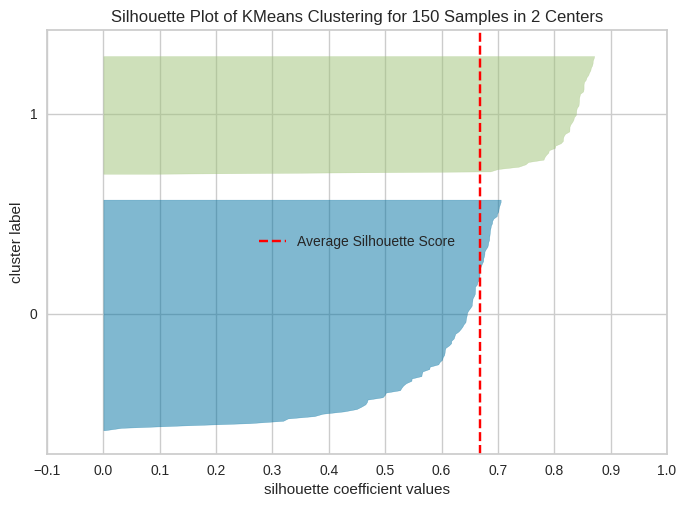

SSE: 179.1222103386809
Silhouette Score: 0.6681326410824573



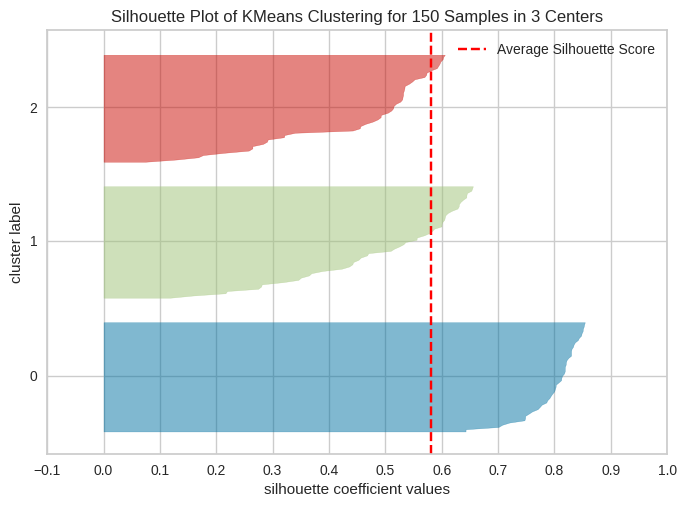

SSE: 87.31002785114046
Silhouette Score: 0.5814925823987305



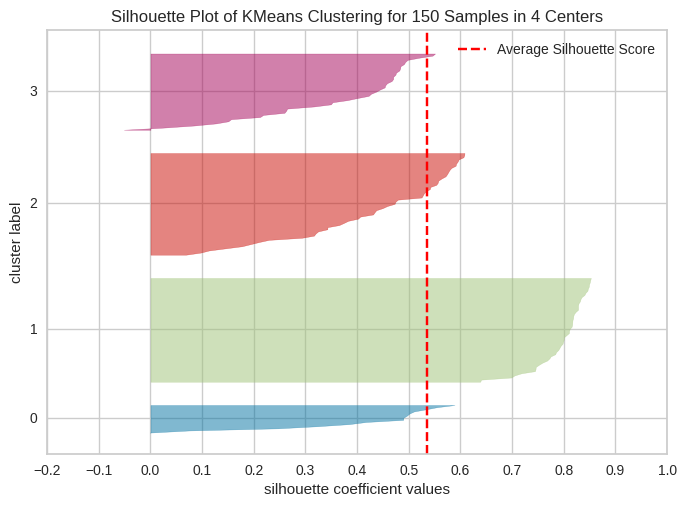

SSE: 66.9079888888889
Silhouette Score: 0.5382547248176347



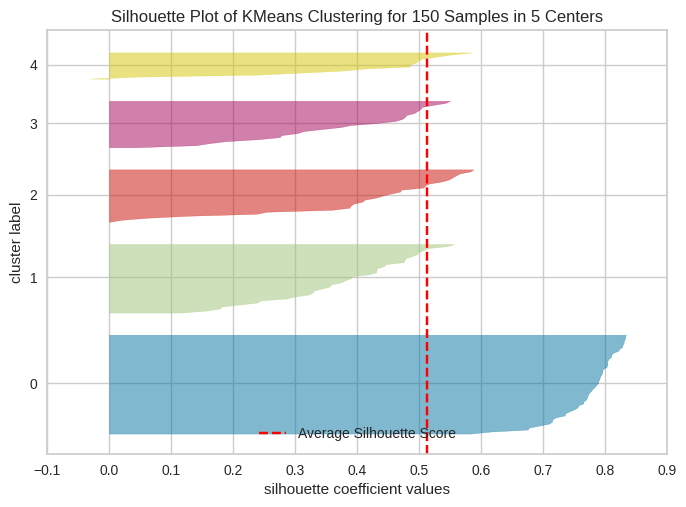

SSE: 51.25789999999999
Silhouette Score: 0.5035515003314536



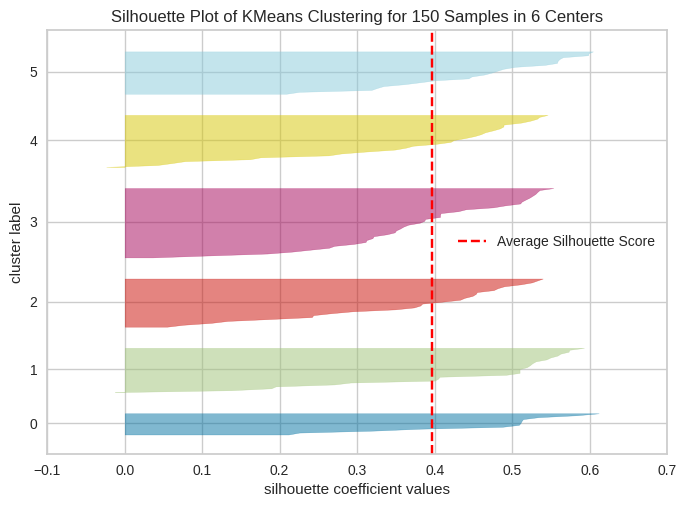

SSE: 43.00493868394088
Silhouette Score: 0.5188353083865377



In [35]:
# Iris Clustering with K-means and silhouette graphs
from yellowbrick.cluster import SilhouetteVisualizer

data = arff.loadarff('iris.arff')
df = pd.DataFrame(data[0])
df = df.map(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
df = pd.get_dummies(df, drop_first=True)
iris_data = df.to_numpy()
X = iris_data[:, :-1]

for i in range(2, 7):
  clf = KMeans(n_clusters=i, init='random', n_init=10)
  visualizer = SilhouetteVisualizer(clf, colors='yellowbrick')
  visualizer.fit(X)
  visualizer.show()
  silhouette = silhouette_score(X, clf.fit_predict(X))
  print(f'SSE: {clf.inertia_}')
  print(f'Silhouette Score: {silhouette}')
  print()

#### Discussion
Discuss your results and justify which clustering is best based on the silhouette graphs

It was interesting to me how even though the inertia levels decreased, showing the size of the clusters decreasing, as the k values got larger, the silhouette scores seemed to also decrease, indicating that the clusters were not as succinct with higher k-values. The clustering that is the best from this data is the k=3 cluster. Even though it does not have the highest silhouette score, it still has wide clusters and a higher silhouette score, suggesting that the clusters are relatively well defined. This also optimized the SSE value (inertia) by substantially decreasing it from the k=2 model. The inertia value indicates how compact the clusters are, and the k=3 was able to separate the data in a very compact way. Even though the inertia continues to decrease as k increases, the rate is slower than the rate it decreased between k=2 and k=3. By optimizing both of the SSE and the silhouette score with k=3 it makes it the best of these models for this data.

## 3 (20%) Iris Clustering with HAC

- Use the same dataset as above and learn with HAC clustering
- Create one table with silhouette scores for k=2-6 for each of the linkage options single, average, complete, and ward

In [36]:
#HAC with Iris
data = arff.loadarff('iris.arff')
df = pd.DataFrame(data[0])
df = df.map(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
df = pd.get_dummies(df, drop_first=True)
iris_data = df.to_numpy()
X = iris_data[:, :-1]

linkage = ['single', 'average', 'complete', 'ward']
k_values = [2, 3, 4, 5, 6]

result = {}

for option in linkage:
  result[option] = []
  for k in k_values:
    hac = AgglomerativeClustering(n_clusters=k, linkage=option)
    hac.fit(X)
    silhouette = silhouette_score(X, hac.fit_predict(X))
    result[option].append({k: silhouette})

df_list = []
for method, values in result.items():
    for entry in values:
        for k, score in entry.items():
            df_list.append({"k": k, "method": method, "score": score})
df = pd.DataFrame(df_list).pivot(index="k", columns="method", values="score").reset_index()
df.columns.name = None

print(df)

   k   average  complete    single      ward
0  2  0.670536  0.670536  0.670536  0.670536
1  3  0.581493  0.556183  0.578011  0.578011
2  4  0.519611  0.463223  0.519611  0.549676
3  5  0.491049  0.479264  0.472081  0.517664
4  6  0.482641  0.333035  0.446898  0.514322


#### Discussion
Discuss your results and compare with your k-means results. <br>
Discuss your table that contains the silhouette scores for k=2,3,4,5,6 and for each of the different linkage options. <br>
Discuss how the linkage options affect your scores.

For both the KMeans model and the HAC model, the sihlouette scores decrease as the k increases. I would have thought the opposite would have happened, because as there are more clusters the data would have more opportunities to have tighter clusters, but this was not the case. Because the silhouette score also has to balance the separability of the clusters, not just the compactness, it does start to make sense why this happened. While the compactness of the cluster may have increased, it was harder to separate between the clusters which made the overall silhouette score decrease as k increased. This could be the case for both k-means and hac.

The different linkage options had the highest affect on the data with the higher k-values. The ward option was able to keep the silhouette score the highest overall which was interesting to see. Since this method measures the variation of each cluster, it makes sense that this one would have less dramatic changes between k values. The other linkage options measure distances that can change dramatically with more centroids. With a distance measurement, different points that are clustered together with one k value have a higher probability of being clustered differently when more centroids are introduced. This probability decreases for the ward linkage because while the variance of the clusters may change, it would only change slightly between each iteration. The ward linkage calculates the sum of squares distances for each cluster, and looks at how much the distance would increase as the model agglomerates each cluster. The dendrograph formed from the ward linkage would have less dramatic distances than the dendrograms formed by the other linkage methods.

## 4 (20%) Run both algorithms on a real world data
- Choose any real world data set which you have not used previously
- Use parameters of your choosing
- Try each algorithm a few times with different parameters and output one typical example of labels and silhouette scores for each algorithm
- Show the silhouette graph for at least one reasonable *k* value for K-means

K-means Labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 1 1 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 3 3 3 2 2 2 3 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 3 2 3 3 3 2 3 1 1 1 3 1 1 1 1 1 1 1 0 1 1 1 1 1 1 3 3
 2 2 2 3 0 0 0 0 3 0 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 3 3 2 3 2 3 2 2
 2 0 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 3 2 2 3 2 2 1 1 1 1 1 1 3 1 1 1 1 1 1 3
 1 0 0 1 3 3 3 3 0 3]
K-means Silhouette Score: 0.5217191590043926


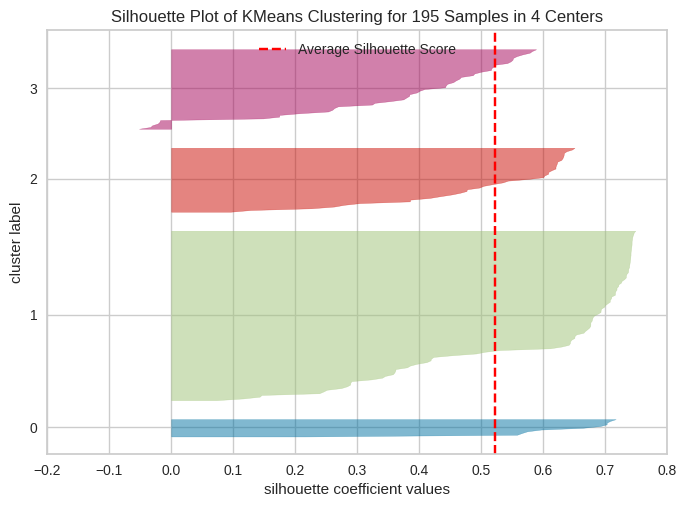


HAC Labels: [2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 1 1 1 0 0 0 1 1 1 1 1 1 1 2 3
 2 2 2 2 2 2 2 2 2 2 1 0 0 0 1 0 1 2 2 1 1 2 2 2 2 2 2 2 3 1 2 2 2 2 2 1 1
 0 0 0 1 3 3 3 3 1 3 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 0 1 0 0
 0 3 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 1 0 0 1 0 0 2 2 2 2 2 2 0 2 2 2 2 2 2 1
 2 3 3 2 1 1 1 1 3 1]
HAC Silhouette Score: 0.5112611742815026


In [37]:
# Run both algoriths on a data set of your choice
parkinsons_data = pd.read_csv('parkinsons.data')
parkinsons_data = parkinsons_data.drop(columns=['name', 'status'])
park_df = parkinsons_data.map(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
park_df = pd.get_dummies(park_df, drop_first=True)
park_data = park_df.to_numpy()

#KMeans
real_kmeans = KMeans(n_clusters=4, init="k-means++", random_state=42)
real_kmeans.fit(park_data)
kmeans_silhouette = silhouette_score(park_data, real_kmeans.fit_predict(park_data))
real_kmeans_labels = real_kmeans.labels_
print(f'K-means Labels: {real_kmeans_labels}')
print(f'K-means Silhouette Score: {kmeans_silhouette}')
visualizer = SilhouetteVisualizer(real_kmeans, colors='yellowbrick')
visualizer.fit(park_data)
visualizer.show()

print()

#HAC
real_hac = AgglomerativeClustering(n_clusters=4, linkage='ward')
real_hac.fit(park_data)
hac_silhouette = silhouette_score(park_data, real_hac.fit_predict(park_data))
real_hac_labels = real_hac.labels_
print(f'HAC Labels: {real_hac_labels}')
print(f'HAC Silhouette Score: {hac_silhouette}')

#### Discussion
Discuss your results and compare the algorithms you used. Which worked best? How do you know? Base your discussion on what you know about the algorithms and the hyperparameters and scoring methods. Why would you choose either algorithm?

The classification labels for each data point were slightly different between the two but the overall clustering seemed to be pretty similar between the two models. The KMeans model did have a higher silhouette score however, showing that this model would be the better one for this Parkinson's dataset. As I was testing the two algorithms I tried different k values, and found that 4 was the optimal for this dataset. I also tried different values for the init hyperparameter with the KMeans model, and decided that the k-means++ was optimal. For the HAC model, I tried different linkage values and the ward option was the one that returned the best clustering. Since the silhouette scores for both algorithms were above 0.5 is is clear that both could be effective models for clustering this data, but since the KMeans had a slightly higher silhouette value, this means that it did a better job at differentiating between the various overlap regions and dealing with outliers.

Overall, the KMeans model is better for data that has a more random distribution, because it will randomly place centroids throughout the data. The HAC model is better for data that has stronger separation as it then will be able to clearly deliminate between clusters as it aggregates them together.

## 5. Extra Credit for Coding Your Own Clustering Algorithms
### 5.1 (Optional 10% extra credit) Code up the K-means clustering algorithm
Below is a scaffold you could use if you want. As above, you only need to support numeric inputs, but think about how you would support nominal inputs and unknown values. Requirements for this task:
- Your model should support the methods shown in the example scaffold below.
- Ability to choose *k* and specify the *k* initial centroids.
- Run and show the cluster label for each point with both the Iris data set and the data set of your choice above.

### 5.2 (Optional 10% extra credit) Code up the HAC clustering algorithm

- Your model should support the methods shown in the example scaffold below.
- HAC should support both single link and complete link options.
- HAC automatically generates all clusterings from *n* to 2.  You just need to output results for the curent chosen *k*.
- Run and show the cluster label for each point with both the Iris data set and the data set of your choice above.

#### Discussion
Discussion and comparision of each model implemented

** Your discussion goes here **

In [38]:
from sklearn.base import BaseEstimator, ClassifierMixin, ClusterMixin

class KMEANSClustering(BaseEstimator,ClusterMixin):

    def __init__(self,k=3,debug=False): ## add parameters here
        """
        Args:
            k = how many final clusters to have
            debug = if debug is true use the first k instances as the initial centroids otherwise choose random points as the initial centroids.
        """
        self.k = k
        self.debug = debug

    def fit(self, X, y=None):
        """ Fit the data; In this lab this will make the K clusters :D
        Args:
            X (array-like): A 2D numpy array with the training data
            y (array-like): An optional argument. Clustering is usually unsupervised so you don't need labels
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        return self

    def print_labels(self): # Print the cluster label for each data point
        pass

In [39]:
class HACClustering(BaseEstimator,ClusterMixin):

    def __init__(self,k=3,link_type='single'): ## add parameters here
        """
        Args:
            k = how many final clusters to have
            link_type = single or complete. when combining two clusters use complete link or single link
        """
        self.link_type = link_type
        self.k = k

    def fit(self, X, y=None):
        """ Fit the data; In this lab this will make the K clusters :D
        Args:
            X (array-like): A 2D numpy array with the training data
            y (array-like): An optional argument. Clustering is usually unsupervised so you don't need labels
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        return self

    def print_labels(self): # Print the cluster label for each data point
        pass